In [1]:

import getdist
from getdist import plots, MCSamples
from getdist.paramnames import escapeLatex, makeList, mergeRenames
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
%matplotlib inline


g = plots.getSubplotPlotter(width_inch=8)

In [9]:
ss_4b_lcdm = Path.home() / 'weaklens' / 'cosmolib' / 'output' / 'shrihan-des-y3-fidA.txt'
fiducial_2x2_lcdm_4b = Path.home() / 'weaklens' / 'cosmolib' / 'output' / 'shrihan-des-y3-fidA-nautilus.txt'
chain_ss_4b_lcdm = np.genfromtxt(ss_4b_lcdm, names=True)
chain_fiducial_2x2_lcdm_4b = np.genfromtxt(fiducial_2x2_lcdm_4b, names=True)

In [16]:
chain_ss_4b_lcdm.dtype.names

('cosmological_parametersomega_m',
 'cosmological_parametersh0',
 'cosmological_parametersomega_b',
 'cosmological_parametersn_s',
 'cosmological_parameterss_8',
 'cosmological_parametersmnu',
 'shear_calibration_parametersm1',
 'shear_calibration_parametersm2',
 'shear_calibration_parametersm3',
 'shear_calibration_parametersm4',
 'wl_photoz_errorsbias_1',
 'wl_photoz_errorsbias_2',
 'wl_photoz_errorsbias_3',
 'wl_photoz_errorsbias_4',
 'intrinsic_alignment_parametersa1',
 'intrinsic_alignment_parametersa2',
 'intrinsic_alignment_parametersalpha1',
 'intrinsic_alignment_parametersalpha2',
 'intrinsic_alignment_parametersbias_ta',
 'COSMOLOGICAL_PARAMETERSSIGMA_8',
 'COSMOLOGICAL_PARAMETERSSIGMA_12',
 'DATA_VECTOR2PT_CHI2',
 'prior',
 'like',
 'post',
 'weight')

In [19]:
chain_fiducial_2x2_lcdm_4b.dtype.names

('cosmological_parametersomega_m',
 'cosmological_parametersh0',
 'cosmological_parametersomega_b',
 'cosmological_parametersn_s',
 'cosmological_parameterss_8',
 'cosmological_parametersmnu',
 'shear_calibration_parametersm1',
 'shear_calibration_parametersm2',
 'shear_calibration_parametersm3',
 'shear_calibration_parametersm4',
 'wl_photoz_errorsbias_1',
 'wl_photoz_errorsbias_2',
 'wl_photoz_errorsbias_3',
 'wl_photoz_errorsbias_4',
 'intrinsic_alignment_parametersa1',
 'intrinsic_alignment_parametersa2',
 'intrinsic_alignment_parametersalpha1',
 'intrinsic_alignment_parametersalpha2',
 'intrinsic_alignment_parametersbias_ta',
 'COSMOLOGICAL_PARAMETERSSIGMA_8',
 'COSMOLOGICAL_PARAMETERSSIGMA_12',
 'DATA_VECTOR2PT_CHI2',
 'log_weight',
 'prior',
 'post')

Removed no burn in
Removed no burn in


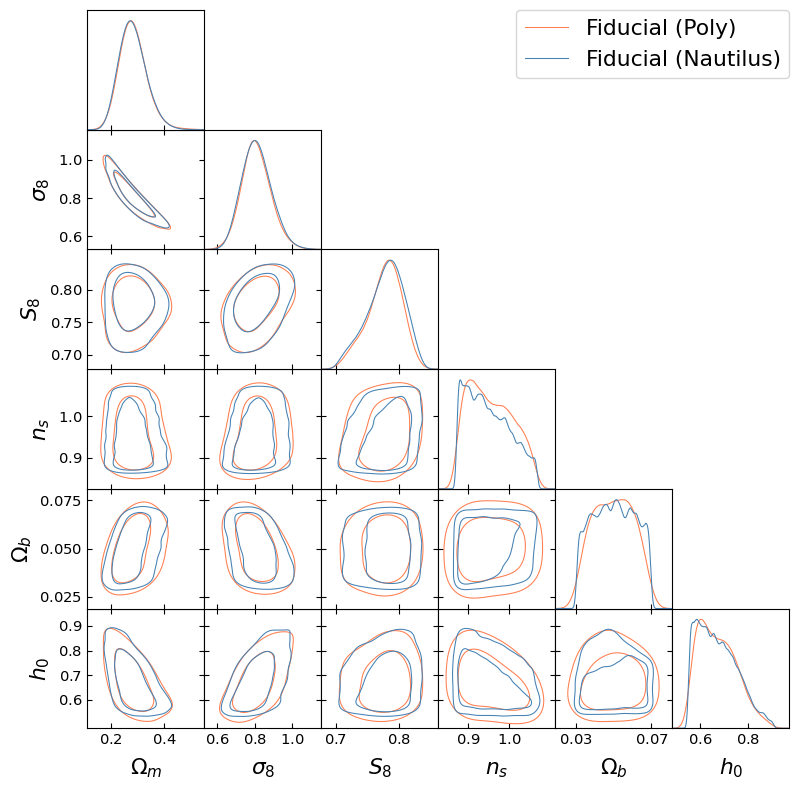

In [27]:
omm = 0.#,#0.03
oss = 0.#,#0.03
uu = chain_ss_4b_lcdm
ss_4b = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m']+omm,uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
                               (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3)+oss,
                                uu['cosmological_parametersn_s'], uu['cosmological_parametersomega_b'], uu['cosmological_parametersh0']],
                                weights=(uu['weight']), names = ['Om','sigma8','s8','ns', 'Ob', 'h0'], labels = ['\Omega_{m}','\sigma_8','S_8','n_s', '\Omega_b', 'h_0'])

uu = chain_fiducial_2x2_lcdm_4b
fid_4b = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m']+omm,uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
                                (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3)+oss,
                                 uu['cosmological_parametersn_s'], uu['cosmological_parametersomega_b'], uu['cosmological_parametersh0']],
                                 weights=np.exp(uu['log_weight']), names = ['Om','sigma8','s8','ns', 'Ob', 'h0'], labels = ['\Omega_{m}','\sigma_8','S_8','n_s','\Omega_b', 'h_0'])


g.settings.axes_labelsize = 20
g.settings.axes_fontsize =15
g.settings.legend_fontsize = 20
g.settings.linewidth = 2

g.triangle_plot([ss_4b, fid_4b], ['Om', 'sigma8', 's8', 'ns', 'Ob', 'h0'], filled=[False,False,True, True], 
                colors=['coral','steelblue'], alphas=[1,1, 0.6],
                legend_labels=['Fiducial (Poly)', 'Fiducial (Nautilus)'],  legend_loc='upper right',fontsize=20, 
                contour_colors=['coral','steelblue'],
                ls = ['-','-','-','-'], contour_ls = ['-','-','-','-'])

In [6]:
g.add_text('LCDM 2x2pt 4 bins\nFiducial', fontsize = 20, y = 1.5)
# plt.draw()
# plt.show()
g.export('plot.pdf')



In [8]:
uu = chain_ss_4b_lcdm
ss_4b = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m'],uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
                                (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3),],
                                 weights=(uu['weight']), names = ['Om','sigma8','s8'], labels = ['\Omega_{m}','\sigma8','S_8'])

# uu = chain_fiducial_2x2_lcdm_4b
# fid_4b = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m'],uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
#                                  (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3),],
#                                   weights=(uu['weight']), names = ['Om','sigma8','s8'], labels = ['\Omega_{m}','\sigma8','S_8'])

Removed no burn in


In [10]:
ss_4b_params = ss_4b.getParams()
# fid_4b_params = fid_4b.getParams()

In [11]:
print  ("Omega_m: {0:2.3f}+-{1:2.3f}".format( ss_4b.mean(ss_4b_params.Om),0.5*(ss_4b.twoTailLimits(ss_4b_params.Om, 0.68)[1]-ss_4b.twoTailLimits(ss_4b_params.Om, 0.68)[0])))
#print  ("Omega_m: {0:2.3f}+-{1:2.3f}".format( fid_4b.mean(fid_4b_params.Om),0.5*(fid_4b.twoTailLimits(fid_4b_params.Om, 0.68)[1]-fid_4b.twoTailLimits(fid_4b_params.Om, 0.68)[0])))


Omega_m: 0.320+-0.037


In [12]:
print  ("s8: {0:2.3f}+-{1:2.3f}".format( ss_4b.mean(ss_4b_params.s8),0.5*(ss_4b.twoTailLimits(ss_4b_params.s8, 0.68)[1]-ss_4b.twoTailLimits(ss_4b_params.s8, 0.68)[0])))
#print  ("s8: {0:2.3f}+-{1:2.3f}".format( fid_4b.mean(fid_4b_params.s8),0.5*(fid_4b.twoTailLimits(fid_4b_params.s8, 0.68)[1]-fid_4b.twoTailLimits(fid_4b_params.s8, 0.68)[0])))


s8: 0.778+-0.035


In [13]:
print  ("sigma8: {0:2.3f}+-{1:2.3f}".format( ss_4b.mean(ss_4b_params.sigma8),0.5*(ss_4b.twoTailLimits(ss_4b_params.sigma8, 0.68)[1]-ss_4b.twoTailLimits(ss_4b_params.sigma8, 0.68)[0])))
#print  ("sigma8: {0:2.3f}+-{1:2.3f}".format( fid_4b.mean(fid_4b_params.sigma8),0.5*(fid_4b.twoTailLimits(fid_4b_params.sigma8, 0.68)[1]-fid_4b.twoTailLimits(fid_4b_params.sigma8, 0.68)[0])))


sigma8: 0.758+-0.069
